### Multivariate random variables

We now consider the problem of simulating a $D$-dimensional random vector:

$$
X_1, X_2, \cdots, X_D
$$
- $X_d$, $d = 1,...,D$ - Possibly dependent, and, can have different marginal distributions.

1. The simple case:
    - $X_1, X_2, \cdots, X_D$ - Mutually independent.

2. The general case:
    - $X_1, X_2, \cdots, X_D$ - dependent


---

### Independent Random Variables

Two random variables $X$ and $Y$ are independent if, $\forall \mathcal{A}, \mathcal{B}$

$$
\mathbb{P}(X\in\mathcal{A},Y\in\mathcal{B})=\mathbb{P}(X\in\mathcal{A})\mathbb{P}(Y\in\mathcal{B})
$$

- $f_X(x), f_Y(y)$ - Marginal PDFs of $X$ and $Y$ respectively.
- $f_{X,Y}(x, y)$ - Joint PDF of $(X, Y)$.

$X, Y$ are independent if, and only if, $\forall x, y$:

$$
f_{X,Y}(x,y)=f_X(x)f_Y(y)
$$

- $F_X(x), F_Y(y)$ - Marginal CDFs of $X$ and $Y$ respectively.
- $F_{X, Y}(x, y)$ - Joint CDF of $(X, Y)$

$X, Y$ are independent if, and only if, $\forall x, y$:

$$
F_{X,Y}(x,y)=F_X(x)F_Y(y)
$$


---

### Mutually independent random variables

$D$ random variables $X_1, X_2, \cdots, X_D$ are mutually independent if, $\forall \mathcal{A}_1, \cdots, \mathcal{A}_D$

$$
\mathbb{P}(X_1\in\mathcal{A}_1,\ldots,X_D\in\mathcal{A}_D)=\mathbb{P}(X_1\in\mathcal{A}_1)\ldots\mathbb{P}(X_D\in\mathcal{A}_D)
$$

- $f_{X_d}(x_d)$ - Marginal PDF of $X_d$, $d = 1, ..., D$
- $f_{X_1, \cdots, X_D}(x_1, \cdots, x_D)$ - Joint PDF of $X_1, \cdots, X_D$.

$X_1, \cdots, X_D$ are mutually independent if, and only if, $\forall x_1, \cdots, x_D$:

$$
f_{X_1,\ldots,X_D}(x_1,\ldots,x_D)=f_{X_1}(x_1)\ldots f_{X_D}(x_D)
$$

> A similar result holds for the CDFs


---

### Simulate independent random variables

If the $D$ random variables $X_1, \cdots, X_D$ are mutually independent, then each random variable $X_d$ can be simulated independent according to its marginal distribution, using one of the previously introduced simulation algorithms (inversion method, acceptance-rejection method, etc.)

- The uniform distribution simulations underlying the generation of each simulation with distribution $X_d$ must come from the **same pseudorandom number generator**.

- This straightforward approach does not work if the random vairable $X_1, \cdots, X_D$ are dependent.


---

### Correlated random variables

The easiest example of simulation of dependent random variable is the case of two Gaussian variables with prescribed correlation $\rho$.

The correlation (Persion correlation, or linear correlation) between two random variables $X$ and $Y$ is defined by:

$$
\rho_{X,Y}=\frac{\mathbb{C}\mathrm{ov}(X,Y)}{\sigma_X\sigma_Y}
$$

- $\mathbb{C}\mathrm{ov}(X,Y)$ - Covariance between $X$ and $Y$
- $\sigma_X, \sigma_Y$ - Standard deviation of $X$ and $Y$


If two random variables are independent, then $\rho_{X,Y} = 0$.

However, the converse is generally not true:
- Two uncorrelated random variables are not necessarily independent.

Classical counterexample:
- $X$ - Standard Gaussian variable
- $Y = X^2$

$X$ and $Y$ are perfectly dependent.

However, $X$ and $Y$ are uncorrelated since $\mathbb{E}[XY]=\mathbb{E}[X^3]=0=\mathbb{E}[X]\mathbb{E}[Y]$

- Uncorrelatedness is equivalent to independence ONLY in special case when $X$ and $Y$ follow a joint normal distribution.

- Correltaion is a good measure of dependence ONLY in the multivariate Gaussian case

---

## 1. Simulation of Correlated Gaussian Variables

### 1.1 Bivariate Gaussian Variables

- $X \sim \mathcal{N}(0, 1)$, $Y \sim \mathcal{N}(0, 1)$ - Independent Standard Gaussian Variables

$$
\color{yellow}
Z:=\rho X+\sqrt{1-\rho^2}Y
$$

- $Z$ - Also a standard Gaussian variable, with correlation $\rho$ between $X$ and $Z$

> Indeed, $Z$ is a Gaussian variable (as a linear combination of two independent Gaussian variables).

1. Mean of $Z$ - $\mathbb{E}[Z]=0$
2. Variance of $Z$ - $\mathbb{V}\mathrm{ar}[Z]=\rho^2\mathbb{V}\mathrm{ar}[X]+(1-\rho^2)\mathbb{V}\mathrm{ar}[Y]=1,$

- $Z \sim \mathcal{N}(0, 1)$

$Z$'s correlation with $X$:

$$
\rho_{X,Z}=\mathbb{E}[XZ]=\rho\mathbb{E}[X^2]+\sqrt{1-\rho^2}\mathbb{E}[X]\mathbb{E}[Y]=\rho
$$




---

### 1.2 Multivariate Gaussian Variables

- $\mathcal{N}(\mu, \Sigma)$ - Multivariate Gaussian Distribution
- $\mu \in \R^D$ - Location vector
- $\Sigma \in \R^{D \times D}$ - Covariance matrix

$$
f(\mathbf{x})=\frac{1}{\sqrt{(2\pi)^D\det(\boldsymbol{\Sigma})}}\mathrm{exp}\left(-\frac{1}{2}(\mathbf{x}-\mu)^\top\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\mu)\right)
$$

Using this new notation, the previous bivariate gaussian vecotr $[X, Z]^T$ has:
- Mean - $\mu=[0,0]^\top$
- Covariance - $\boldsymbol{\Sigma}=\begin{bmatrix}1&\rho\\\rho&1\end{bmatrix}$








---

### 1.3 Simulate Multivariate Gaussian Variables

If the covariance matrix can be decomposed as,

$$
\mathbf{\Sigma}=\mathbf{A}\mathbf{A}^\top
$$

Then if $\mathbf{N}\sim\mathcal{N}(\mathbf{0},\mathbf{I})$ is a standard multivariate Gaussian vector, then,

$$
\color{yellow}
\mathbf{X}=\mu+\mathbf{AN}\sim\mathcal{N}(\mu,\mathbf{\Sigma})
$$






---

### 1.4 Simulate Bivariate Gaussian Variables

Simulated Two correlated Gaussian variable:

$$
\begin{bmatrix}
X_1\\X_2\end{bmatrix}\sim\mathcal{N}\left(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}1&\rho\\\rho&1
\end{bmatrix}\right)
$$

from two independent standard Gaussian variables:

$$
\left.\begin{bmatrix}N_1\\N_2\end{bmatrix}\sim\mathcal{N}\left(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}1&0\\0&1\end{bmatrix}\right.\right)
$$

The square root $\mathrm{A}$ of the covariance matrix:

$$
\boldsymbol{\Sigma}=\begin{bmatrix}1&\rho\\\rho&1\end{bmatrix}
$$

is given by:

$$
\mathbf{A}=\begin{bmatrix}1&0\\\rho&\sqrt{1-\rho^2}\end{bmatrix}
$$

> Indeed, one can verify that $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^\top$

Multiplying $\mathrm{A}$ by a vector of independent standard Gaussian variables yields:

$$
\mathbf{A}\begin{bmatrix}N_1\\N_2\end{bmatrix}=\begin{bmatrix}1&0\\\rho&\sqrt{1-\rho^2}\end{bmatrix}\begin{bmatrix}N_1\\N_2\end{bmatrix}=\begin{bmatrix}N_1\\\rho N_1+\sqrt{1-\rho^2}N_2\end{bmatrix}=\begin{bmatrix}X_1\\X_2\end{bmatrix}
$$

This verifies that multiplying $[N_1,N_2]^\top\sim\mathcal{N}(\mathbf{0,I})$ by the matrix $\mathrm{A}$ produces a bivariate Gaussian vector:

$$
\begin{bmatrix}X_1\\X_2\end{bmatrix}\sim\mathcal{N}\left(\mu=\begin{bmatrix}0\\0\end{bmatrix},\boldsymbol{\Sigma}=\begin{bmatrix}1&\rho\\\rho&1\end{bmatrix}\right)
$$
- $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^{\top}$


More generally, we can simulate a bivariate Gaussian vector with general mean $\mu$ and general covariance $\Sigma$.

A general matrix can be written as:

$$
\boldsymbol{\Sigma}=\begin{bmatrix}\sigma_X^2&\rho\sigma_X\sigma_Y\\\rho\sigma_X\sigma_Y&\sigma_Y^2\end{bmatrix}
$$

The square-root matrix $\mathrm{A}$ is given by:

$$
\begin{bmatrix}\sigma_X&0\\\rho\sigma_Y&\sigma_Y\sqrt{1-\rho^2}\end{bmatrix}
$$


- $[N_1,N_2]^\top\sim\mathcal{N}(\mathbf{0,I})$

$$
\begin{aligned}
\begin{bmatrix}
X_1\\X_2
\end{bmatrix}
& :=
\mu+\mathbf{A}
\begin{bmatrix}N_1\\N_2\end{bmatrix} \\
& = 
\begin{bmatrix}\mu_1\\\mu_2\end{bmatrix} + \begin{bmatrix}\sigma_1&0\\\rho\sigma_2&\sigma_2\sqrt{1-\rho^2}\end{bmatrix}
\begin{bmatrix}N_1\\N_2\end{bmatrix} \\
& = \begin{bmatrix}\mu_1+\sigma_1N_1\\\mu_2+\sigma_2(\rho N_1+\sqrt{1-\rho^2}N_2)\end{bmatrix}
\end{aligned}
$$

- $[X_1,X_2]^\top\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$ has the desired distribution.

In particular,

$$
\begin{aligned}&X_1\sim\mathcal{N}(\mu_1,\sigma_1^2)\\&X_2\sim\mathcal{N}(\mu_2,\sigma_2^2)\\&\mathbb{C}\mathrm{orr}(X_1,X_2)=\rho\end{aligned}
$$


---

### 1.5 Simluate Multivariate Gaussian Variables

- $\mathbf{N}=[N_1,N_2,\ldots,N_D]^\top\sim\mathcal{N}(\mathbf{0},\mathbf{I})$

These independent Gaussian variables can be simulated, for example, from the Box-Muller algorithm.

In order to simulate $\mathbf{X}=[X_1,X_2,\ldots,X_D]^\top\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$, the only difficulty is to compute the square-root matrix $\mathrm{A}$ of $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^\top$.

This can be achieved using the $\color{yellow}\text{Cholesky Decomposition}$.

> It is a numerically stable algorithm, with computational complexity $\mathcal{O}(D^3)$, and is twice faster than the LU decomposition.

Then, computing $\mathbf{X}=\mu+\mathbf{AN}$ provides simulations with the desired distribution $\mathbf{X}\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$


---

### 1.6 Bivariate Gaussian Simulation with Scipy

In [1]:
import numpy as np
from scipy.stats import norm

mu = np.array([
    [10],
    [30]
])
sigma1, sigma2, rho = 0.4, 0.3, 0.35
S = np.array([
    [sigma1 * sigma1, rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2, sigma2 * sigma2]
])
A = np.linalg.cholesky(S)

print(np.allclose(A@A.T, S), "\n")

N = norm.rvs(size = [2, 1000])
X = mu + A @ N

print((np.mean(X[0,:]), np.std(X[0,:])), "\n")
print((np.mean(X[1,:]), np.std(X[1,:])), "\n")
print(np.corrcoef(X[0,:],X[1,:])[0,1])


True 

(np.float64(10.014965504014887), np.float64(0.3971211288859464)) 

(np.float64(30.006758601545634), np.float64(0.29522094132141485)) 

0.35815358358120203


In [2]:
from scipy.stats import multivariate_normal

mu = np.array([10, 30])
sigma1, sigma2, rho = 0.4, 0.3, 0.35
S = np.array([
    [sigma1 * sigma1, rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2,   sigma2 * sigma2]
])
X = multivariate_normal.rvs(mean = mu, cov = S, size = 1000)

print(np.shape(X), "\n")
print(np.mean(X[:,0]) , np.std(X[:,0]), "\n")
print(np.mean(X[:,1]) , np.std(X[:,1]), "\n")
print(np.corrcoef(X[:,0],X[:,1])[0,1])

(1000, 2) 

10.003981029705638 0.39776705268944407 

30.004019722335947 0.29829783132124443 

0.3054255533757802


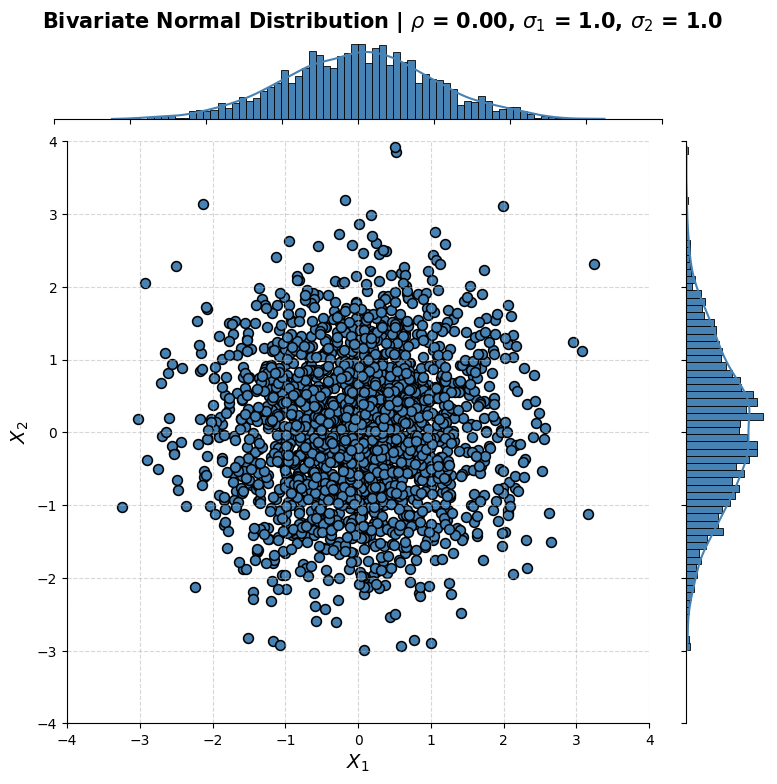

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def create_bivariate_normal_scatter_plot(
    mu = np.array([0, 0]), sigma1 = 1.0, sigma2 = 1.0, rho = 0.0, 
    n_samples = 2000, random_state = 42
) -> np.ndarray:
    """
    Create a joint distribution plot of a bivariate normal distribution
    
    Parameters:
    mu: Mean vector, default is [0, 0]
    sigma1, sigma2: Standard deviations
    rho: Correlation coefficient
    n_samples: Number of samples
    random_state: Random seed
    """    
    # Create covariance matrix
    cov_matrix = np.array([
        [sigma1 ** 2, rho * sigma1 * sigma2],
        [rho * sigma1 * sigma2, sigma2 ** 2]
    ])
    
    # Generate multivariate normal distribution samples
    X = multivariate_normal.rvs(
        mean = mu, cov = cov_matrix, 
        size = n_samples, random_state = random_state
    )
    
    # plt.figure(figsize = (8, 8))
    g = sns.jointplot(
        x = X[:, 0], y = X[:, 1], 
        kind = 'scatter',
        color = "steelblue", s = 200, marker = ".", alpha = 1, edgecolor = "black", 
        marginal_kws = dict(kde = True, fill = True, alpha = 1, color = 'steelblue', bins = 70),
        height = 8,
        ratio = 6
    )
    g.ax_joint.set_xlim([-4, 4])
    g.ax_joint.set_ylim([-4, 4])
    g.ax_joint.set_aspect('equal')
    g.ax_joint.set_xlabel('$X_1$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.set_ylabel('$X_2$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.grid(True, linestyle = '--', alpha = 0.5)
    title = (f'Bivariate Normal Distribution | $\\rho$ = {rho:.2f}, $\\sigma_1$ = {sigma1}, $\\sigma_2$ = {sigma2}')
    plt.suptitle(title, fontsize=15, fontweight='bold', y=0.97)
    plt.tight_layout()
    # plt.savefig("./bivariate_normal_distribution_scatter.svg", format="svg", bbox_inches="tight")
    plt.show()
    
    return X

mu, sigma1, sigma2, rho, n_samples = np.array([0, 0]), 1.0, 1.0, 0.0, 2000
samples = create_bivariate_normal_scatter_plot(mu = mu, sigma1 = sigma1, sigma2 = sigma2, rho = rho, n_samples = n_samples)

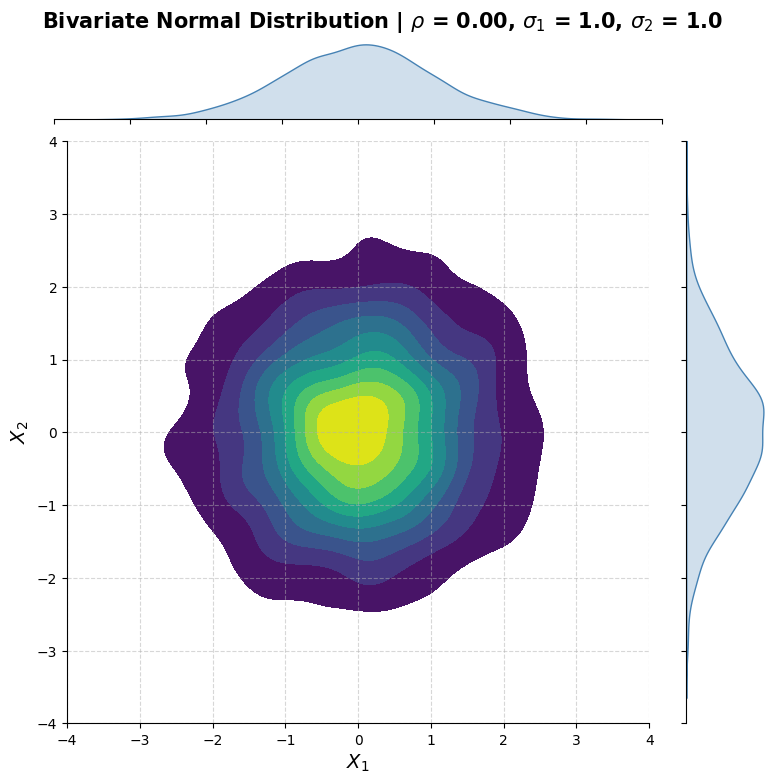

In [ ]:
def create_bivariate_normal_contour_plot(
    mu: np.ndarray = np.array([0, 0]), 
    sigma1: float = 1.0, 
    sigma2: float = 1.0, 
    rho: float = 0.0, 
    n_samples: int = 2000,
    random_state: int = 42
) -> np.ndarray:
    """
    Create a joint distribution plot of a bivariate normal distribution
    
    Parameters:
    mu: Mean vector, default is [0, 0]
    sigma1, sigma2: Standard deviations
    rho: Correlation coefficient
    n_samples: Number of samples
    """
    cov_matrix = np.array([
        [sigma1 ** 2, rho * sigma1 * sigma2],
        [rho * sigma1 * sigma2, sigma2 ** 2]
    ])
    X = multivariate_normal.rvs(mean = mu, cov = cov_matrix, size = n_samples, random_state = random_state)
    
    g = sns.JointGrid(x = X[:, 0], y = X[:, 1], height = 8, ratio = 6)
    sns.kdeplot(
        x = X[:, 0], y = X[:, 1], 
        cmap = "viridis", shade = True, shade_lowest = False, 
        ax = g.ax_joint,
    )
    sns.kdeplot(x = X[:, 0], fill = True, alpha = 0.25, ax = g.ax_marg_x, color = 'steelblue')
    sns.kdeplot(y = X[:, 1], fill = True, alpha = 0.25, ax = g.ax_marg_y, color = 'steelblue')
    g.ax_joint.set_xlim([-4.0, 4.0])
    g.ax_joint.set_ylim([-4.0, 4.0])
    g.ax_joint.set_aspect('equal')
    g.ax_joint.set_xlabel('$X_1$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.set_ylabel('$X_2$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.grid(True, linestyle = '--', alpha = 0.5)
    title = f'Bivariate Normal Distribution | $\\rho$ = {rho:.2f}, $\\sigma_1$ = {sigma1}, $\\sigma_2$ = {sigma2}'
    plt.suptitle(title, fontsize = 15, fontweight = 'bold', y = 0.97)
    plt.tight_layout()
    # plt.savefig("./bivariate_normal_distribution_contour.svg", format="svg", bbox_inches="tight")
    plt.show()
    
    return X

# Example usage
mu, sigma1, sigma2, rho, n_samples = np.array([0, 0]), 1.0, 1.0, 0.0, 2_000
samples = create_bivariate_normal_contour_plot(mu = mu, sigma1 = sigma1, sigma2 = sigma2, rho = rho, n_samples = n_samples)

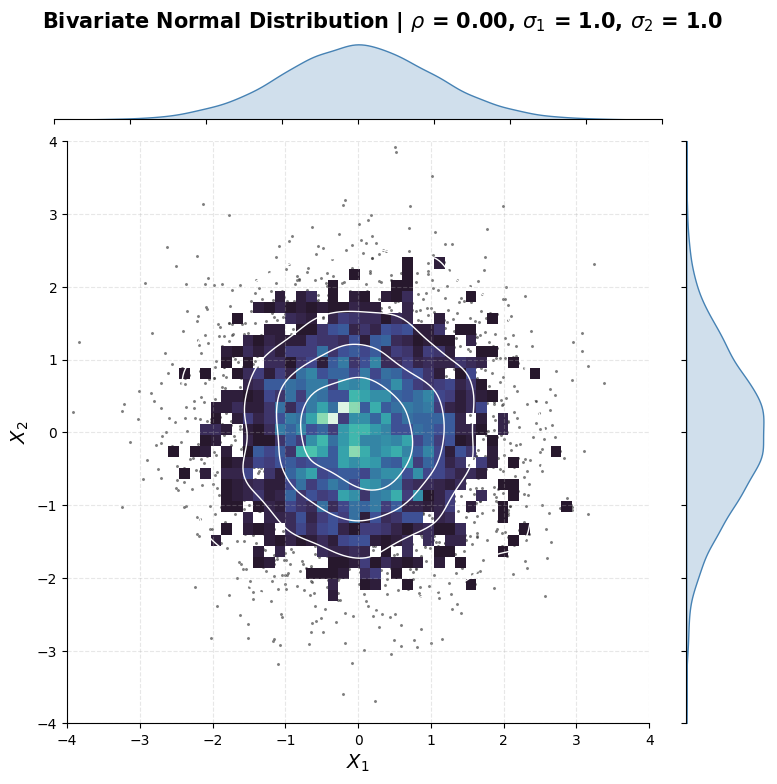

In [148]:
def create_bivariate_normal_combined_plot(
    mu: np.ndarray = np.array([0, 0]), 
    sigma1: float = 1.0, 
    sigma2: float = 1.0, 
    rho: float = 0.0, 
    n_samples: int = 2_000,
    random_state: int = 42
) -> np.ndarray:
    """
    Create a combined scatter, histogram and contour plot of bivariate normal distribution
    
    Parameters:
    mu: Mean vector, default is [0, 0]
    sigma1, sigma2: Standard deviations
    rho: Correlation coefficient
    n_samples: Number of samples
    random_state: Random seed
    """
    cov_matrix = np.array([
        [sigma1 ** 2, rho * sigma1 * sigma2],
        [rho * sigma1 * sigma2, sigma2 ** 2]
    ])
    X = multivariate_normal.rvs(
        mean = mu, cov = cov_matrix, 
        size = n_samples, random_state = random_state
    )
    
    g = sns.JointGrid(x = X[:, 0], y = X[:, 1], height = 8, ratio = 6)
    # Main joint plot: scatter + 2D histogram + contour lines
    sns.scatterplot(x = X[:, 0], y = X[:, 1], s = 5, color = ".15", alpha = 0.6, ax = g.ax_joint)
    sns.histplot(x = X[:, 0], y = X[:, 1], bins = 50, pthresh = 0.1, cmap = "mako", ax = g.ax_joint)
    sns.kdeplot(x = X[:, 0], y = X[:, 1], levels = 5, color = "white", linewidths = 1, ax = g.ax_joint)
    # Marginal distributions with KDE and filling
    sns.kdeplot(x = X[:, 0], fill = True, alpha = 0.25, color = "steelblue", ax = g.ax_marg_x)
    sns.kdeplot(y = X[:, 1], fill = True, alpha = 0.25, color = "steelblue", ax = g.ax_marg_y)
    g.ax_joint.set_xlim([-4.0, 4.0])
    g.ax_joint.set_ylim([-4.0, 4.0])
    g.ax_joint.set_aspect('equal')
    g.ax_joint.set_xlabel('$X_1$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.set_ylabel('$X_2$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.grid(True, linestyle = '--', alpha = 0.3)
    title = f'Bivariate Normal Distribution | $\\rho$ = {rho:.2f}, $\\sigma_1$ = {sigma1}, $\\sigma_2$ = {sigma2}'
    plt.suptitle(title, fontsize = 15, fontweight = 'bold', y = 0.97)
    plt.tight_layout()
    # plt.savefig("./bivariate_normal_distribution_combined.svg", format="svg", bbox_inches="tight")
    plt.show()
    
    return X

mu, sigma1, sigma2, rho, n_samples = np.array([0, 0]), 1.0, 1.0, 0.0, 5_000
samples = create_bivariate_normal_combined_plot(mu = mu, sigma1 = sigma1, sigma2 = sigma2, rho = rho, n_samples = n_samples)
